# Introduction

This Python 3 environment comes with many helpful analytics libraries installed
It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
For example, here's several helpful packages to load

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as pp
from preprocessor import Preprocessor
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

df_train: pd.DataFrame = pd.read_csv("./input/train.csv")
df_test: pd.DataFrame = pd.read_csv("./input/test.csv")

df_train.describe()
print(df_train.info())
print(df_train.head(10))
print(df_train.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         

# Preprocessing (siehe Preprocessor)

In [12]:
X_y, X, y = Preprocessor().fit_transform(df_train)
X_np, y_np = X.to_numpy(), y.to_numpy()

X.info()
X.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      712 non-null    int64  
 1   Sex         712 non-null    int64  
 2   Age         712 non-null    float64
 3   SibSp       712 non-null    int64  
 4   Parch       712 non-null    int64  
 5   Fare        712 non-null    float64
 6   Embarked    712 non-null    int64  
 7   Sex_0       712 non-null    bool   
 8   Sex_1       712 non-null    bool   
 9   Parch_0     712 non-null    bool   
 10  Parch_1     712 non-null    bool   
 11  Parch_2     712 non-null    bool   
 12  Parch_3     712 non-null    bool   
 13  Parch_4     712 non-null    bool   
 14  Parch_5     712 non-null    bool   
 15  Parch_6     712 non-null    bool   
 16  Pclass_1    712 non-null    bool   
 17  Pclass_2    712 non-null    bool   
 18  Pclass_3    712 non-null    bool   
 19  SibSp_0     712 non-null    b

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_0,Sex_1,Parch_0,...,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,Embarked_0,Embarked_1,Embarked_2
0,3,1,22.0,1,0,7.2500,2,False,True,True,...,True,False,True,False,False,False,False,False,False,True
1,1,0,38.0,1,0,71.2833,0,True,False,True,...,False,False,True,False,False,False,False,True,False,False
2,3,0,26.0,0,0,7.9250,2,True,False,True,...,True,True,False,False,False,False,False,False,False,True
3,1,0,35.0,1,0,53.1000,2,True,False,True,...,False,False,True,False,False,False,False,False,False,True
4,3,1,35.0,0,0,8.0500,2,False,True,True,...,True,True,False,False,False,False,False,False,False,True
6,1,1,54.0,0,0,51.8625,2,False,True,True,...,False,True,False,False,False,False,False,False,False,True
7,3,1,2.0,3,1,21.0750,2,False,True,False,...,True,False,False,False,True,False,False,False,False,True
8,3,0,27.0,0,2,11.1333,2,True,False,False,...,True,True,False,False,False,False,False,False,False,True
9,2,0,14.0,1,0,30.0708,0,True,False,True,...,False,False,True,False,False,False,False,True,False,False
10,3,0,4.0,1,1,16.7000,2,True,False,False,...,True,False,True,False,False,False,False,False,False,True


<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      712 non-null    int64  
 1   Sex         712 non-null    int64  
 2   Age         712 non-null    float64
 3   SibSp       712 non-null    int64  
 4   Parch       712 non-null    int64  
 5   Fare        712 non-null    float64
 6   Embarked    712 non-null    int64  
 7   Sex_0       712 non-null    bool   
 8   Sex_1       712 non-null    bool   
 9   Parch_0     712 non-null    bool   
 10  Parch_1     712 non-null    bool   
 11  Parch_2     712 non-null    bool   
 12  Parch_3     712 non-null    bool   
 13  Parch_4     712 non-null    bool   
 14  Parch_5     712 non-null    bool   
 15  Parch_6     712 non-null    bool   
 16  Pclass_1    712 non-null    bool   
 17  Pclass_2    712 non-null    bool   
 18  Pclass_3    712 non-null    bool   
 19  SibSp_0     712 non-null    b

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_0,Sex_1,Parch_0,...,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,Embarked_0,Embarked_1,Embarked_2
0,3,1,22.0,1,0,7.2500,2,False,True,True,...,True,False,True,False,False,False,False,False,False,True
1,1,0,38.0,1,0,71.2833,0,True,False,True,...,False,False,True,False,False,False,False,True,False,False
2,3,0,26.0,0,0,7.9250,2,True,False,True,...,True,True,False,False,False,False,False,False,False,True
3,1,0,35.0,1,0,53.1000,2,True,False,True,...,False,False,True,False,False,False,False,False,False,True
4,3,1,35.0,0,0,8.0500,2,False,True,True,...,True,True,False,False,False,False,False,False,False,True
6,1,1,54.0,0,0,51.8625,2,False,True,True,...,False,True,False,False,False,False,False,False,False,True
7,3,1,2.0,3,1,21.0750,2,False,True,False,...,True,False,False,False,True,False,False,False,False,True
8,3,0,27.0,0,2,11.1333,2,True,False,False,...,True,True,False,False,False,False,False,False,False,True
9,2,0,14.0,1,0,30.0708,0,True,False,True,...,False,False,True,False,False,False,False,True,False,False
10,3,0,4.0,1,1,16.7000,2,True,False,False,...,True,False,True,False,False,False,False,False,False,True


# Korrelations Matrix
Anfangs erkennen zwischen welchen Features hohe  Korrelationen zu erwarten sind und diese sich genauer ansehen

In [13]:
corr_matrix: pd.DataFrame = X.corr()
corr_matrix


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_0,Sex_1,Parch_0,...,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,Embarked_0,Embarked_1,Embarked_2
Pclass,1.000000,0.150826,-0.365902,0.065187,0.023666,-0.552893,0.244145,-0.150826,0.150826,0.027780,...,0.906051,0.089832,-0.176602,0.009086,0.027634,0.146329,0.076410,-0.279194,0.131989,0.197831
Sex,0.150826,1.000000,0.099037,-0.106296,-0.249543,-0.182457,0.109639,-1.000000,1.000000,0.248220,...,0.158446,0.176132,-0.156539,-0.046091,-0.082438,0.010187,0.028627,-0.103611,-0.027256,0.109078
Age,-0.365902,0.099037,1.000000,-0.307351,-0.187896,0.093143,-0.032565,-0.099037,0.099037,0.279417,...,-0.309944,0.160784,0.018179,-0.092493,-0.142165,-0.251163,-0.112893,0.038268,-0.021693,-0.025431
SibSp,0.065187,-0.106296,-0.307351,1.000000,0.383338,0.139860,0.033064,0.106296,-0.106296,-0.451128,...,0.077060,-0.767863,0.307322,0.304787,0.349973,0.603639,0.405629,-0.046227,0.051331,0.018968
Parch,0.023666,-0.249543,-0.187896,0.383338,1.000000,0.206624,0.011803,0.249543,-0.249543,-0.831057,...,0.027750,-0.336209,0.191418,0.064233,0.150948,0.201393,0.154424,-0.009523,-0.009417,0.013259
Fare,-0.552893,-0.182457,0.093143,0.139860,0.206624,1.000000,-0.283510,0.182457,-0.182457,-0.232088,...,-0.402219,-0.174181,0.121220,0.074535,0.120835,-0.008255,0.019605,0.301337,-0.062346,-0.250994
Embarked,0.244145,0.109639,-0.032565,0.033064,0.011803,-0.283510,1.000000,-0.109639,0.109639,0.036254,...,0.135655,0.036939,-0.078349,-0.008700,0.068030,0.037707,0.043695,-0.968624,-0.154769,0.972939
Sex_0,-0.150826,-1.000000,-0.099037,0.106296,0.249543,0.182457,-0.109639,1.000000,-1.000000,-0.248220,...,-0.158446,-0.176132,0.156539,0.046091,0.082438,-0.010187,-0.028627,0.103611,0.027256,-0.109078
Sex_1,0.150826,1.000000,0.099037,-0.106296,-0.249543,-0.182457,0.109639,-1.000000,1.000000,0.248220,...,0.158446,0.176132,-0.156539,-0.046091,-0.082438,0.010187,0.028627,-0.103611,-0.027256,0.109078
Parch_0,0.027780,0.248220,0.279417,-0.451128,-0.831057,-0.232088,0.036254,-0.248220,0.248220,1.000000,...,0.033043,0.400704,-0.226997,-0.089663,-0.165616,-0.264096,-0.137905,-0.038941,0.009589,0.031718


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_0,Sex_1,Parch_0,...,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,Embarked_0,Embarked_1,Embarked_2
Pclass,1.000000,0.150826,-0.365902,0.065187,0.023666,-0.552893,0.244145,-0.150826,0.150826,0.027780,...,0.906051,0.089832,-0.176602,0.009086,0.027634,0.146329,0.076410,-0.279194,0.131989,0.197831
Sex,0.150826,1.000000,0.099037,-0.106296,-0.249543,-0.182457,0.109639,-1.000000,1.000000,0.248220,...,0.158446,0.176132,-0.156539,-0.046091,-0.082438,0.010187,0.028627,-0.103611,-0.027256,0.109078
Age,-0.365902,0.099037,1.000000,-0.307351,-0.187896,0.093143,-0.032565,-0.099037,0.099037,0.279417,...,-0.309944,0.160784,0.018179,-0.092493,-0.142165,-0.251163,-0.112893,0.038268,-0.021693,-0.025431
SibSp,0.065187,-0.106296,-0.307351,1.000000,0.383338,0.139860,0.033064,0.106296,-0.106296,-0.451128,...,0.077060,-0.767863,0.307322,0.304787,0.349973,0.603639,0.405629,-0.046227,0.051331,0.018968
Parch,0.023666,-0.249543,-0.187896,0.383338,1.000000,0.206624,0.011803,0.249543,-0.249543,-0.831057,...,0.027750,-0.336209,0.191418,0.064233,0.150948,0.201393,0.154424,-0.009523,-0.009417,0.013259
Fare,-0.552893,-0.182457,0.093143,0.139860,0.206624,1.000000,-0.283510,0.182457,-0.182457,-0.232088,...,-0.402219,-0.174181,0.121220,0.074535,0.120835,-0.008255,0.019605,0.301337,-0.062346,-0.250994
Embarked,0.244145,0.109639,-0.032565,0.033064,0.011803,-0.283510,1.000000,-0.109639,0.109639,0.036254,...,0.135655,0.036939,-0.078349,-0.008700,0.068030,0.037707,0.043695,-0.968624,-0.154769,0.972939
Sex_0,-0.150826,-1.000000,-0.099037,0.106296,0.249543,0.182457,-0.109639,1.000000,-1.000000,-0.248220,...,-0.158446,-0.176132,0.156539,0.046091,0.082438,-0.010187,-0.028627,0.103611,0.027256,-0.109078
Sex_1,0.150826,1.000000,0.099037,-0.106296,-0.249543,-0.182457,0.109639,-1.000000,1.000000,0.248220,...,0.158446,0.176132,-0.156539,-0.046091,-0.082438,0.010187,0.028627,-0.103611,-0.027256,0.109078
Parch_0,0.027780,0.248220,0.279417,-0.451128,-0.831057,-0.232088,0.036254,-0.248220,0.248220,1.000000,...,0.033043,0.400704,-0.226997,-0.089663,-0.165616,-0.264096,-0.137905,-0.038941,0.009589,0.031718


# Categorial plots

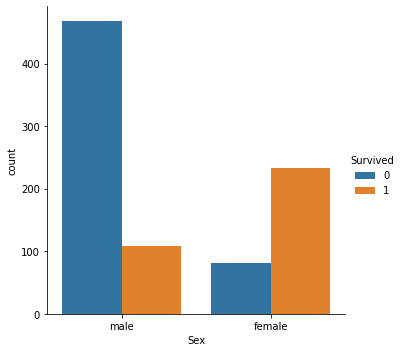

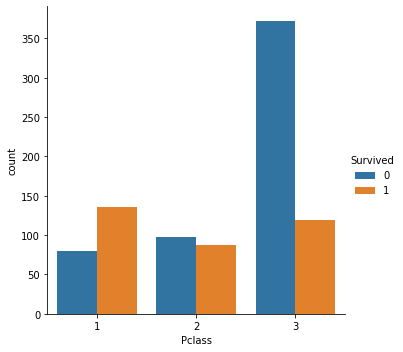

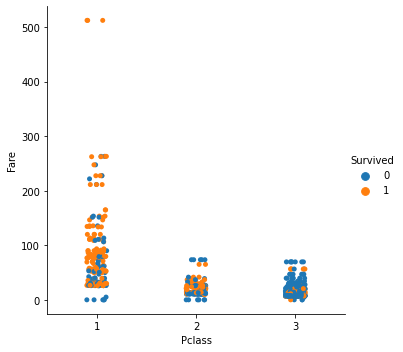

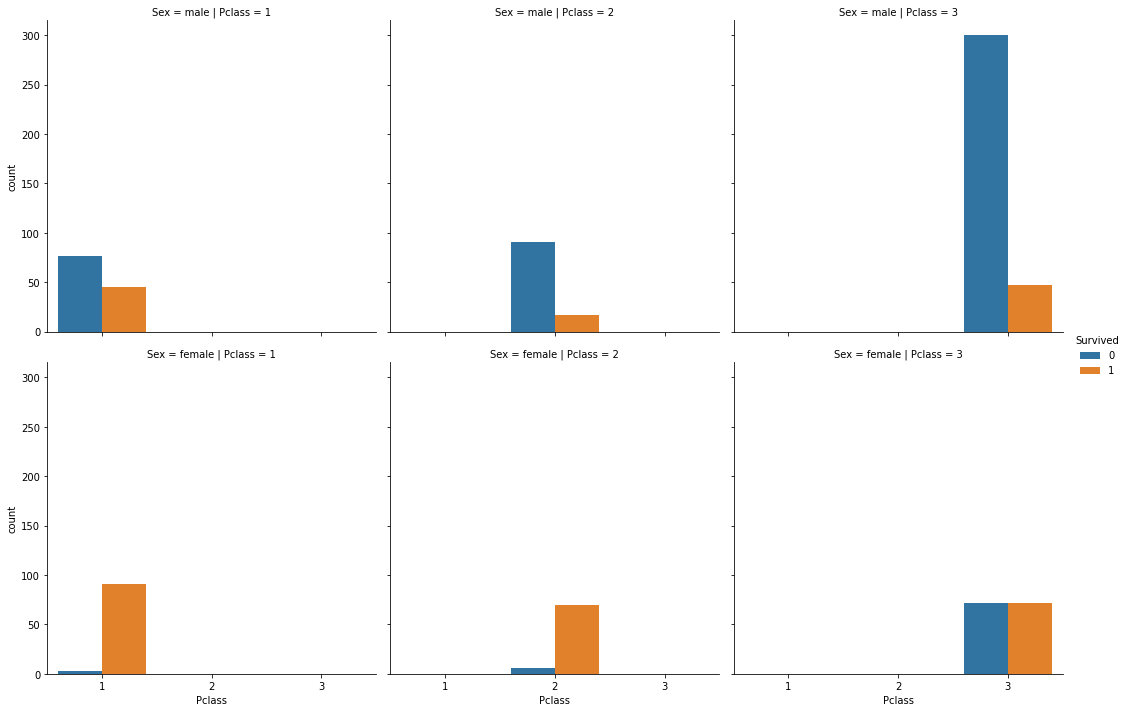

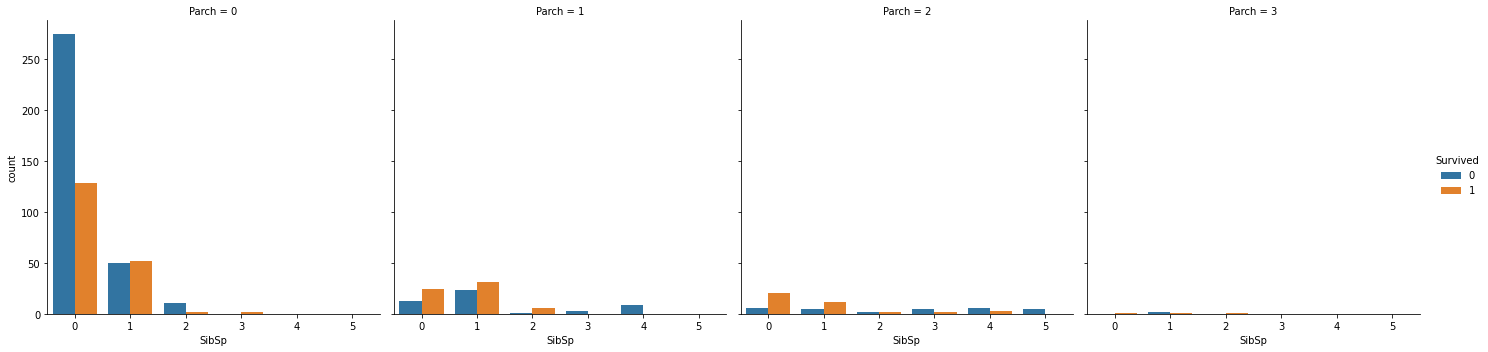

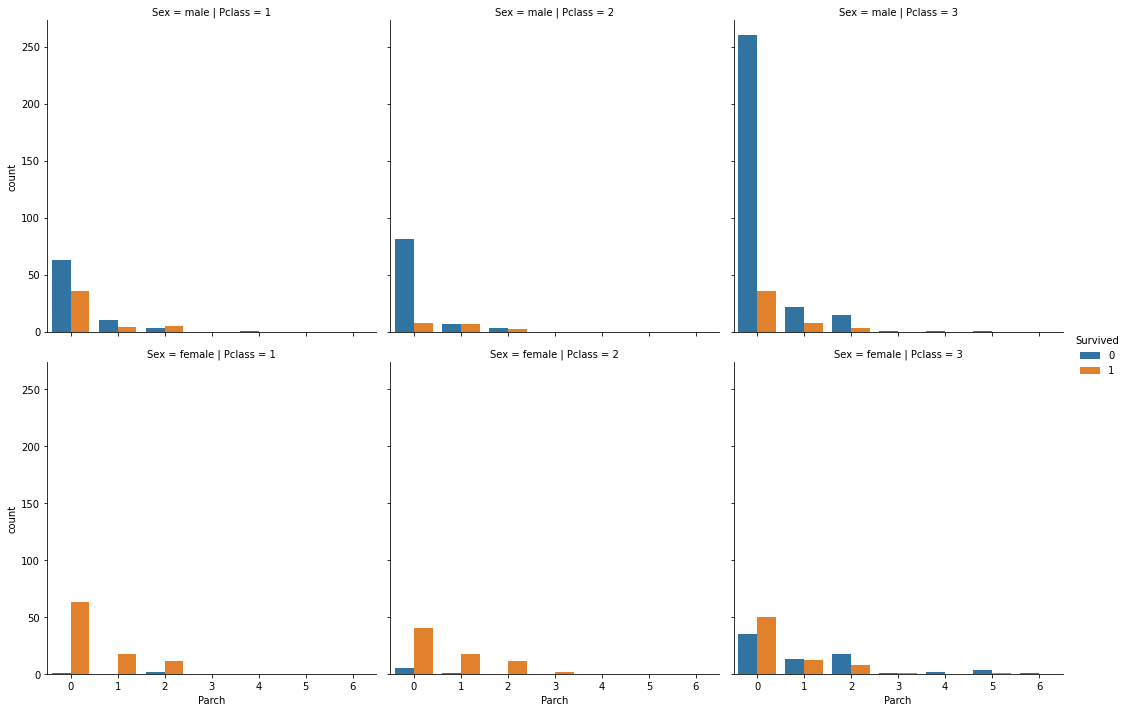

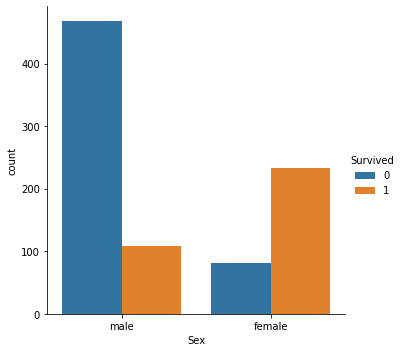

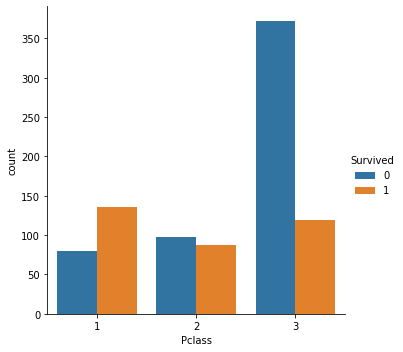

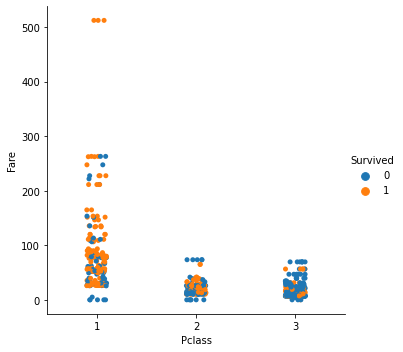

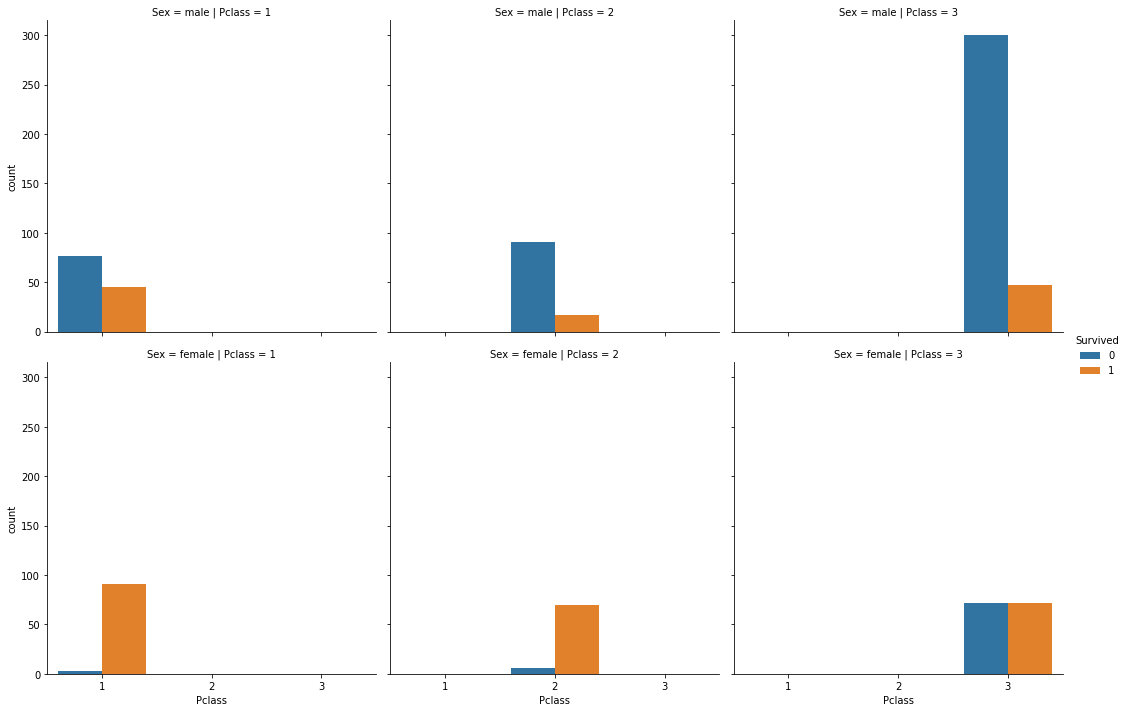

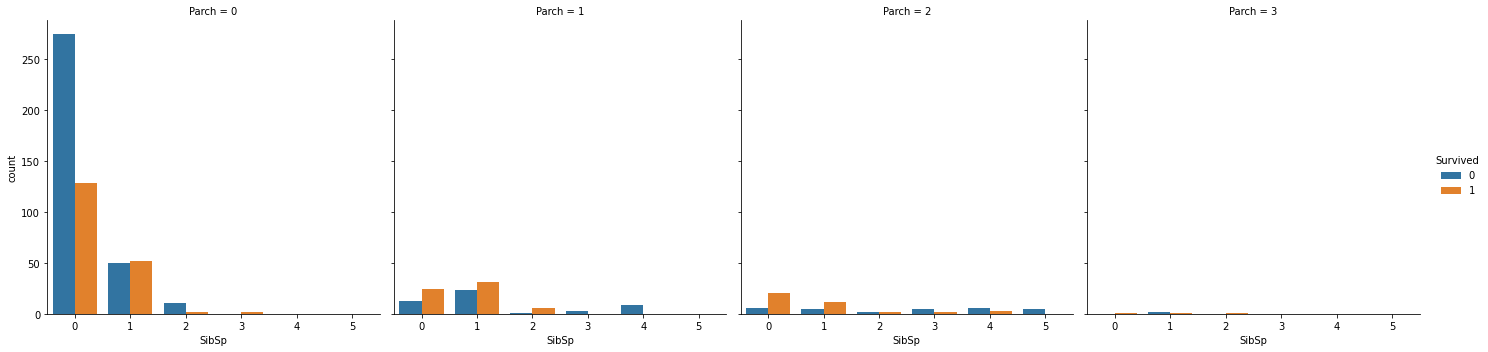

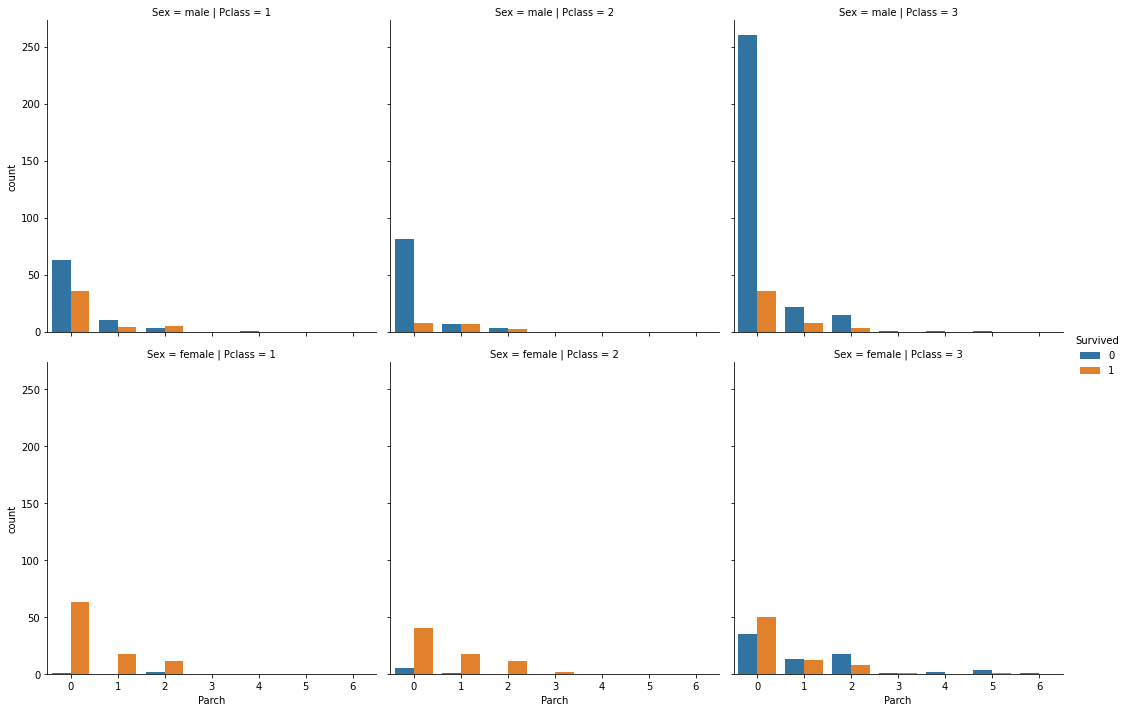

In [14]:
# sns.countplot(x='Sex', hue='Survived', data=df_train)
sns.catplot(x='Sex', hue='Survived', data=df_train, kind='count')
pp.show()
sns.catplot(x='Pclass', hue='Survived', data=df_train, kind='count')
pp.show()
sns.catplot(x='Pclass', hue='Survived', y='Fare', data=df_train)
pp.show()
sns.catplot(x='Pclass', hue='Survived', row='Sex', col='Pclass', data=df_train, kind='count')
pp.show()

sns.catplot(x='SibSp', col='Parch', hue='Survived', data=X_y[X_y["Parch"] < 4], kind='count')
pp.show()

sns.catplot(x='Parch', hue='Survived', row='Sex', col='Pclass', data=df_train, kind='count')
pp.show()

#sns.histplot(x='Age', hue='Survived', data=df_train, binwidth=5.0)
#sns.displot(x='Age', hue='Survived', col='Survived', data=df_train)
#pp.show()

# Distribution plots

## By age

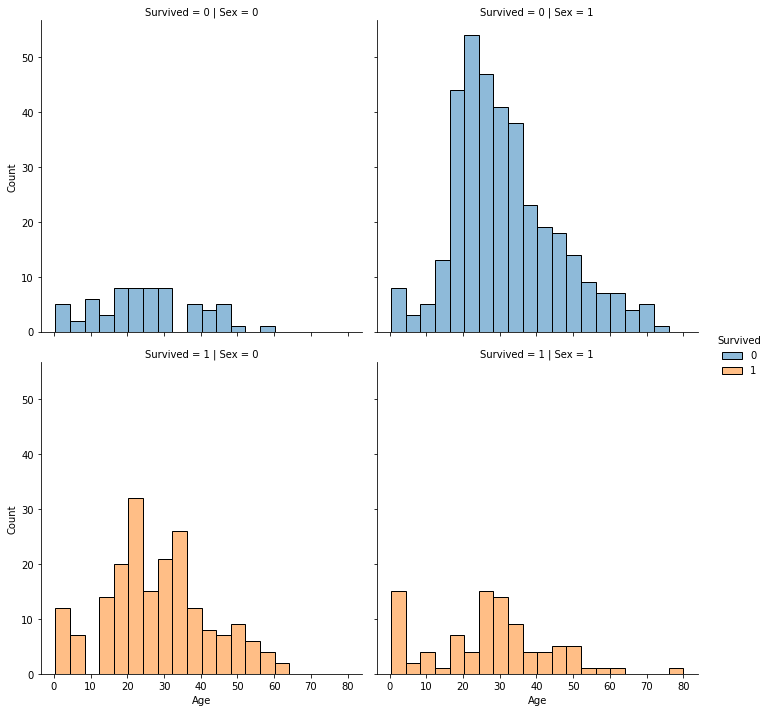

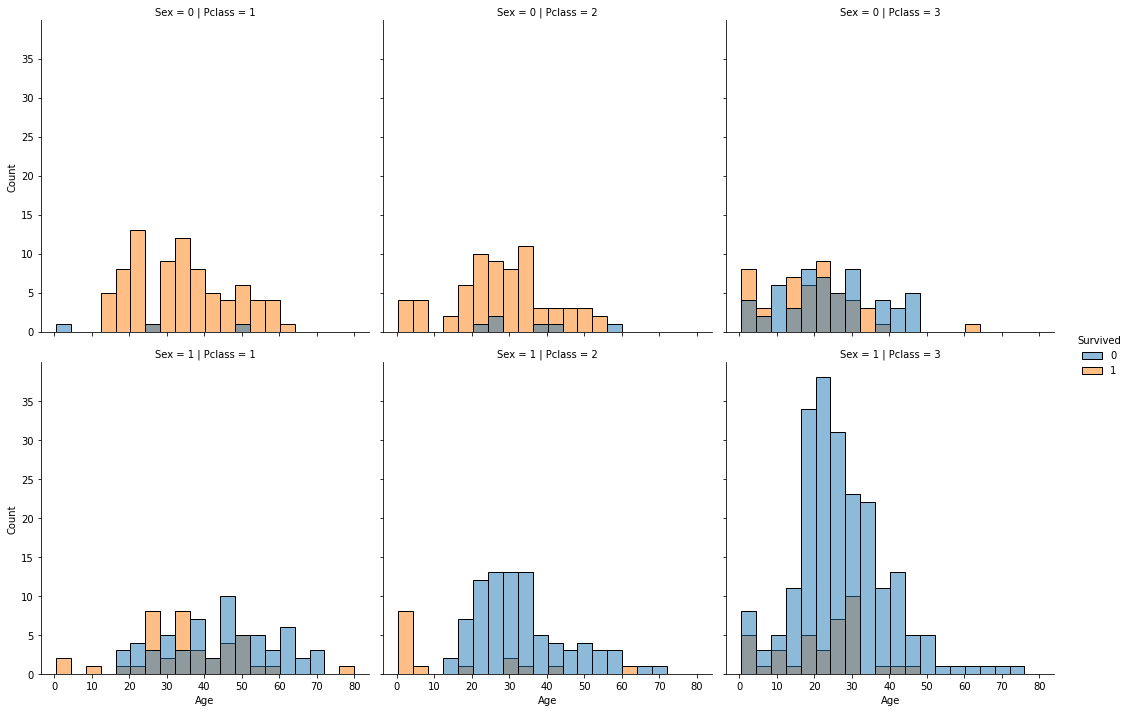

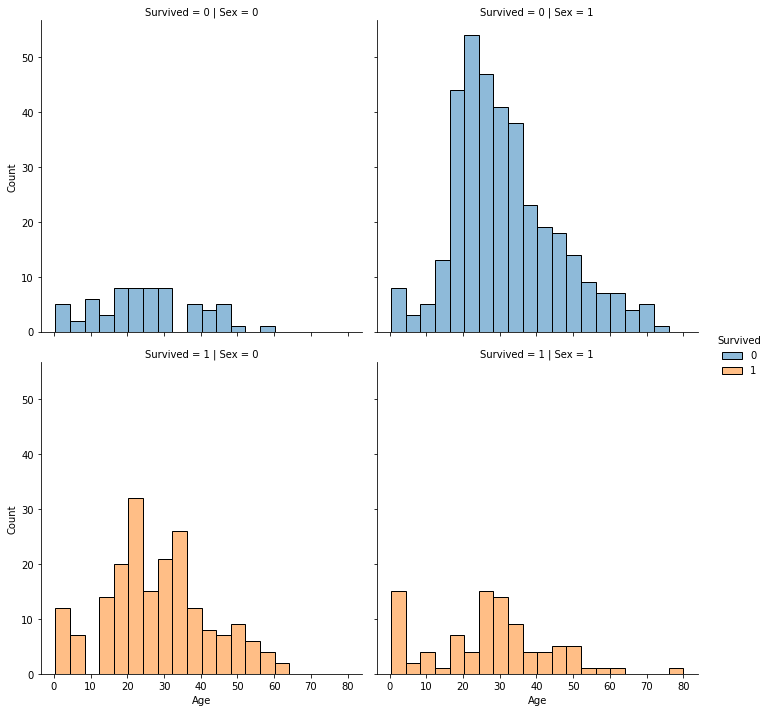

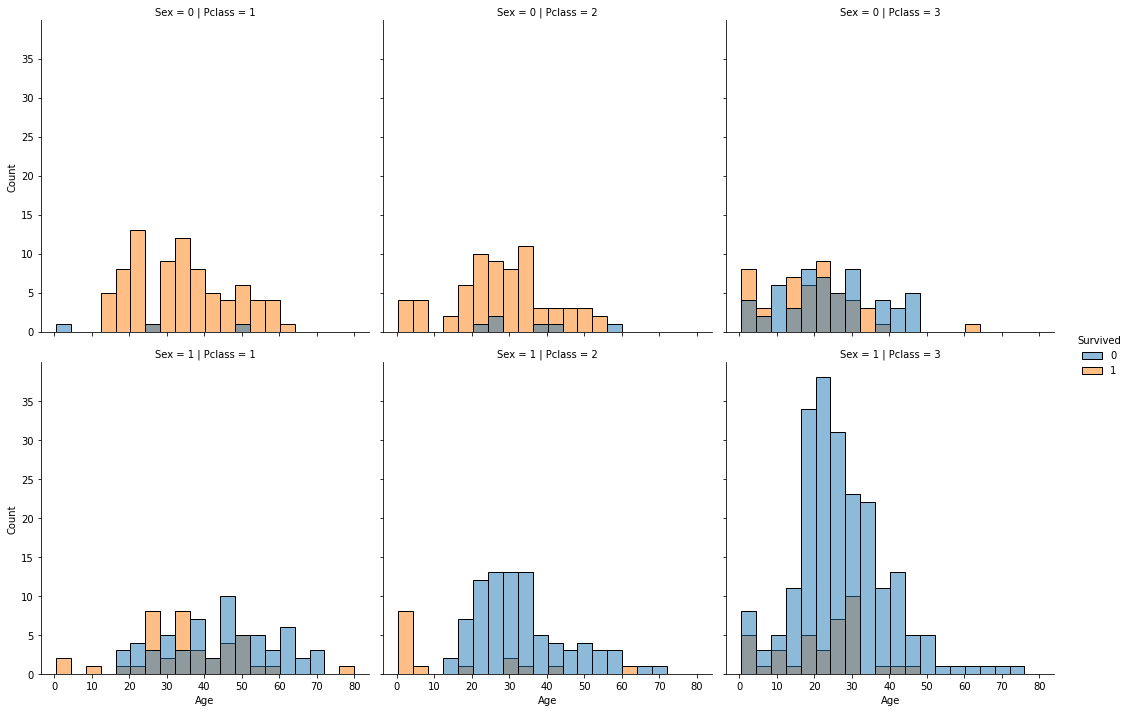

In [15]:
sns.displot(x='Age', hue='Survived', col='Sex', row='Survived', data=X_y)
pp.show()

sns.displot(x='Age', hue='Survived', col='Pclass', row='Sex', data=X_y)
pp.show()

## By fare

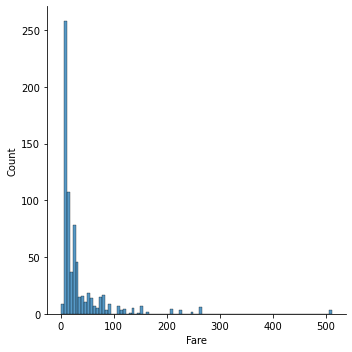

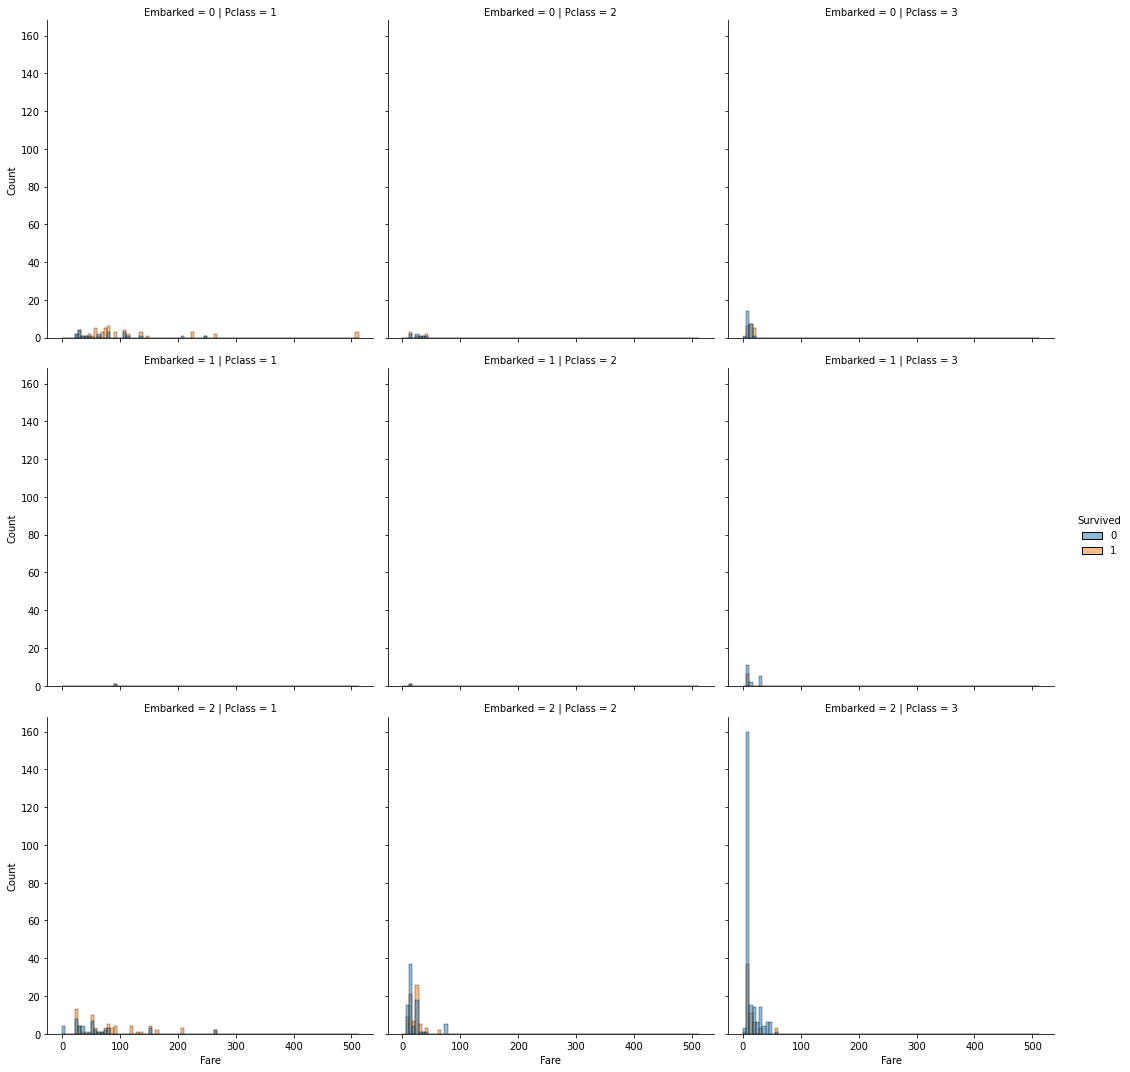

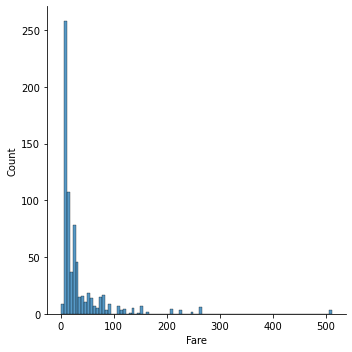

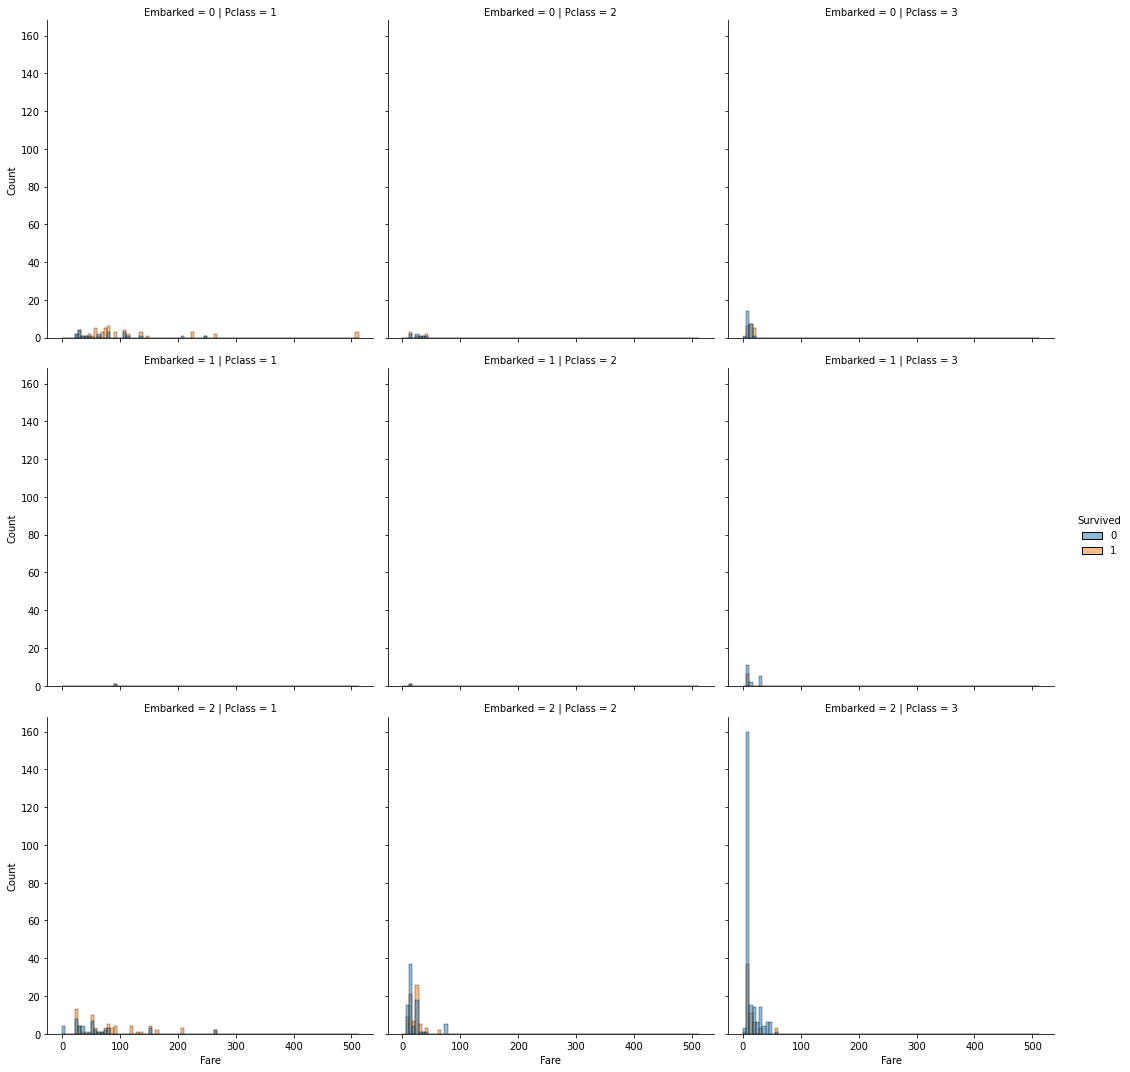

In [16]:
sns.displot(x='Fare', data=X_y)
pp.show()


sns.displot(x='Fare', hue='Survived', col='Pclass', row="Embarked", data=X_y)
pp.show()


In [17]:
# Numeric features: Find pairwise linear dependencies with pair plots in

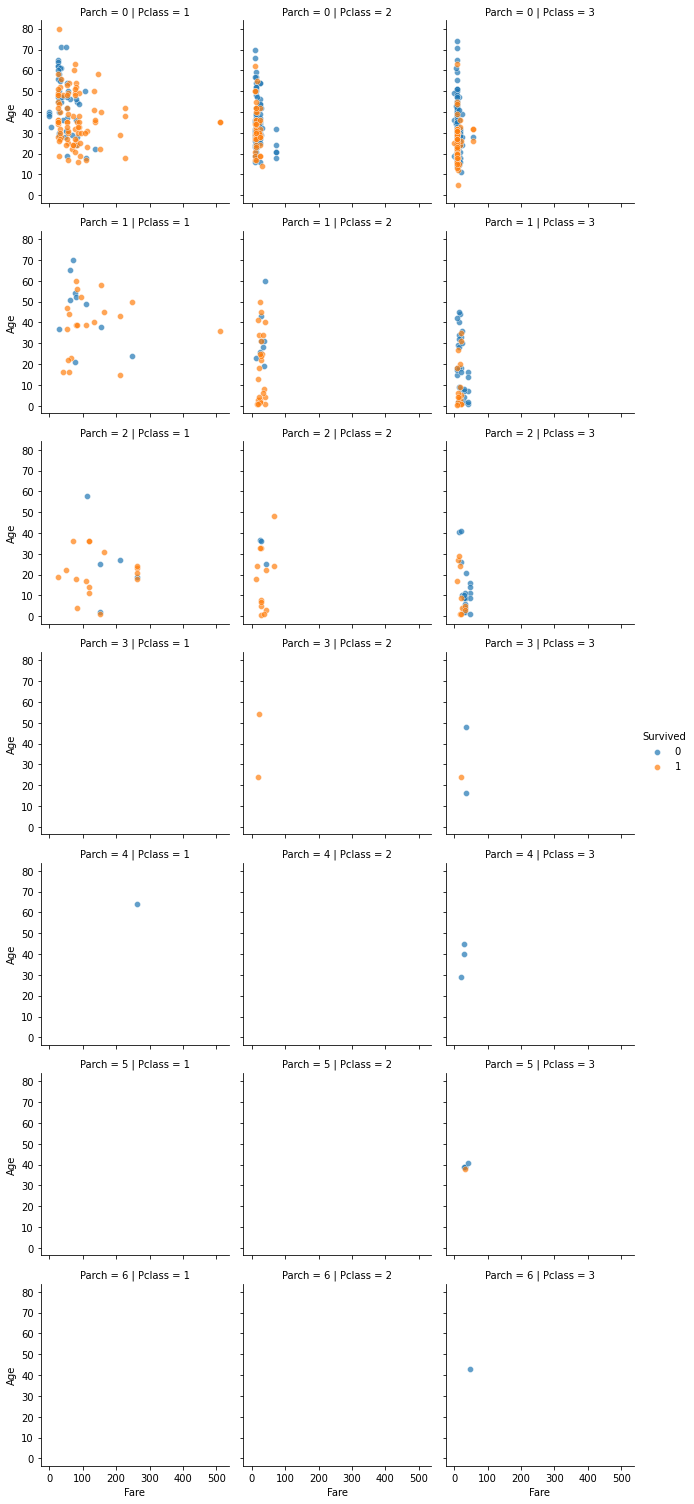

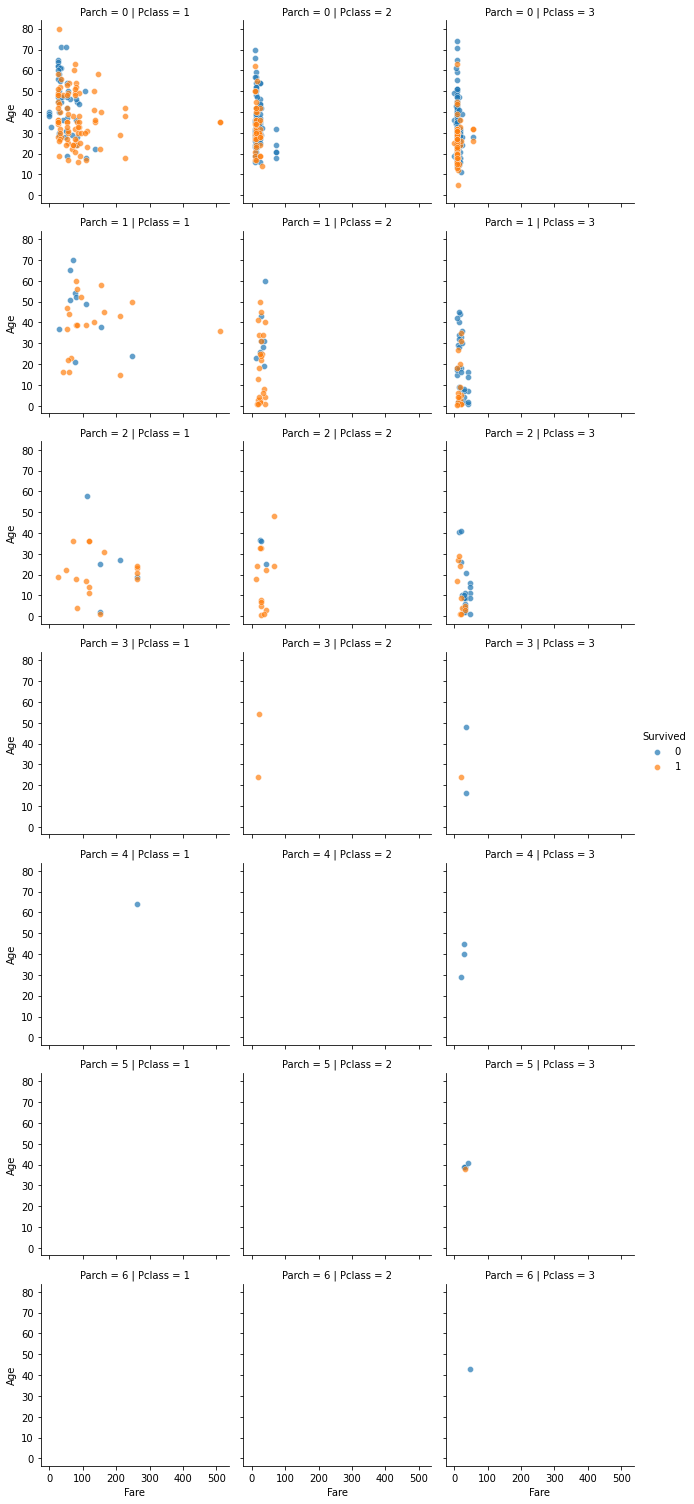

In [18]:
g = sns.FacetGrid(X_y, col="Pclass", row="Parch", hue="Survived")
g.map(sns.scatterplot, "Fare", "Age", alpha=.7)
g.add_legend()


# DecisionTree: Create train and test data from train data set

,Survived,Age,Fare,Sex_0,Sex_1,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,...,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,Embarked_0,Embarked_1,Embarked_2
0,0,22.0,7.2500,False,True,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
1,1,38.0,71.2833,True,False,True,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
2,1,26.0,7.9250,True,False,True,False,False,False,False,...,True,True,False,False,False,False,False,False,False,True
3,1,35.0,53.1000,True,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,0,35.0,8.0500,False,True,True,False,False,False,False,...,True,True,False,False,False,False,False,False,False,True
6,0,54.0,51.8625,False,True,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
7,0,2.0,21.0750,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,True
8,1,27.0,11.1333,True,False,False,False,True,False,False,...,True,True,False,False,False,False,False,False,False,True
9,1,14.0,30.0708,True,False,True,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
10,1,4.0,16.7000,True,False,False,True,False,False,False,...,True,False,True,False,False,False,False,False,False,True


DecisionTreeClassifier(min_samples_split=5, random_state=42)

0.9452247191011236

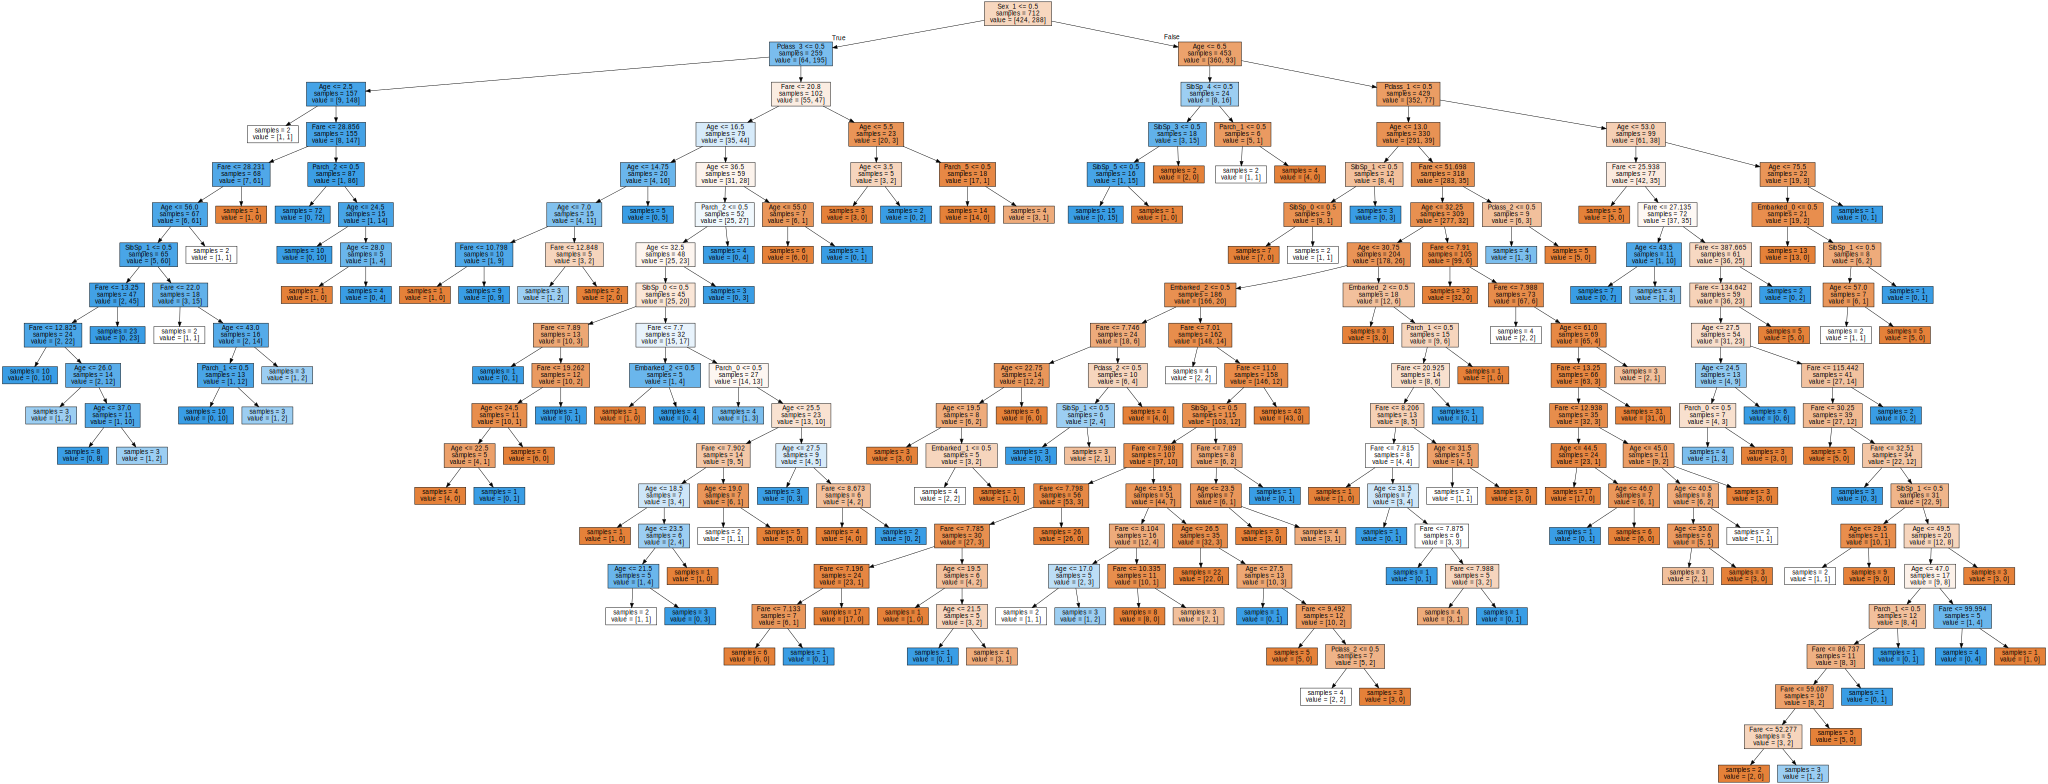

0.7600547730829421

0.05586131119255289

,Survived,Age,Fare,Sex_0,Sex_1,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,...,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,Embarked_0,Embarked_1,Embarked_2
0,0,22.0,7.2500,False,True,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
1,1,38.0,71.2833,True,False,True,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
2,1,26.0,7.9250,True,False,True,False,False,False,False,...,True,True,False,False,False,False,False,False,False,True
3,1,35.0,53.1000,True,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,0,35.0,8.0500,False,True,True,False,False,False,False,...,True,True,False,False,False,False,False,False,False,True
6,0,54.0,51.8625,False,True,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
7,0,2.0,21.0750,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,True
8,1,27.0,11.1333,True,False,False,False,True,False,False,...,True,True,False,False,False,False,False,False,False,True
9,1,14.0,30.0708,True,False,True,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
10,1,4.0,16.7000,True,False,False,True,False,False,False,...,True,False,True,False,False,False,False,False,False,True


DecisionTreeClassifier(min_samples_split=5, random_state=42)

0.9452247191011236

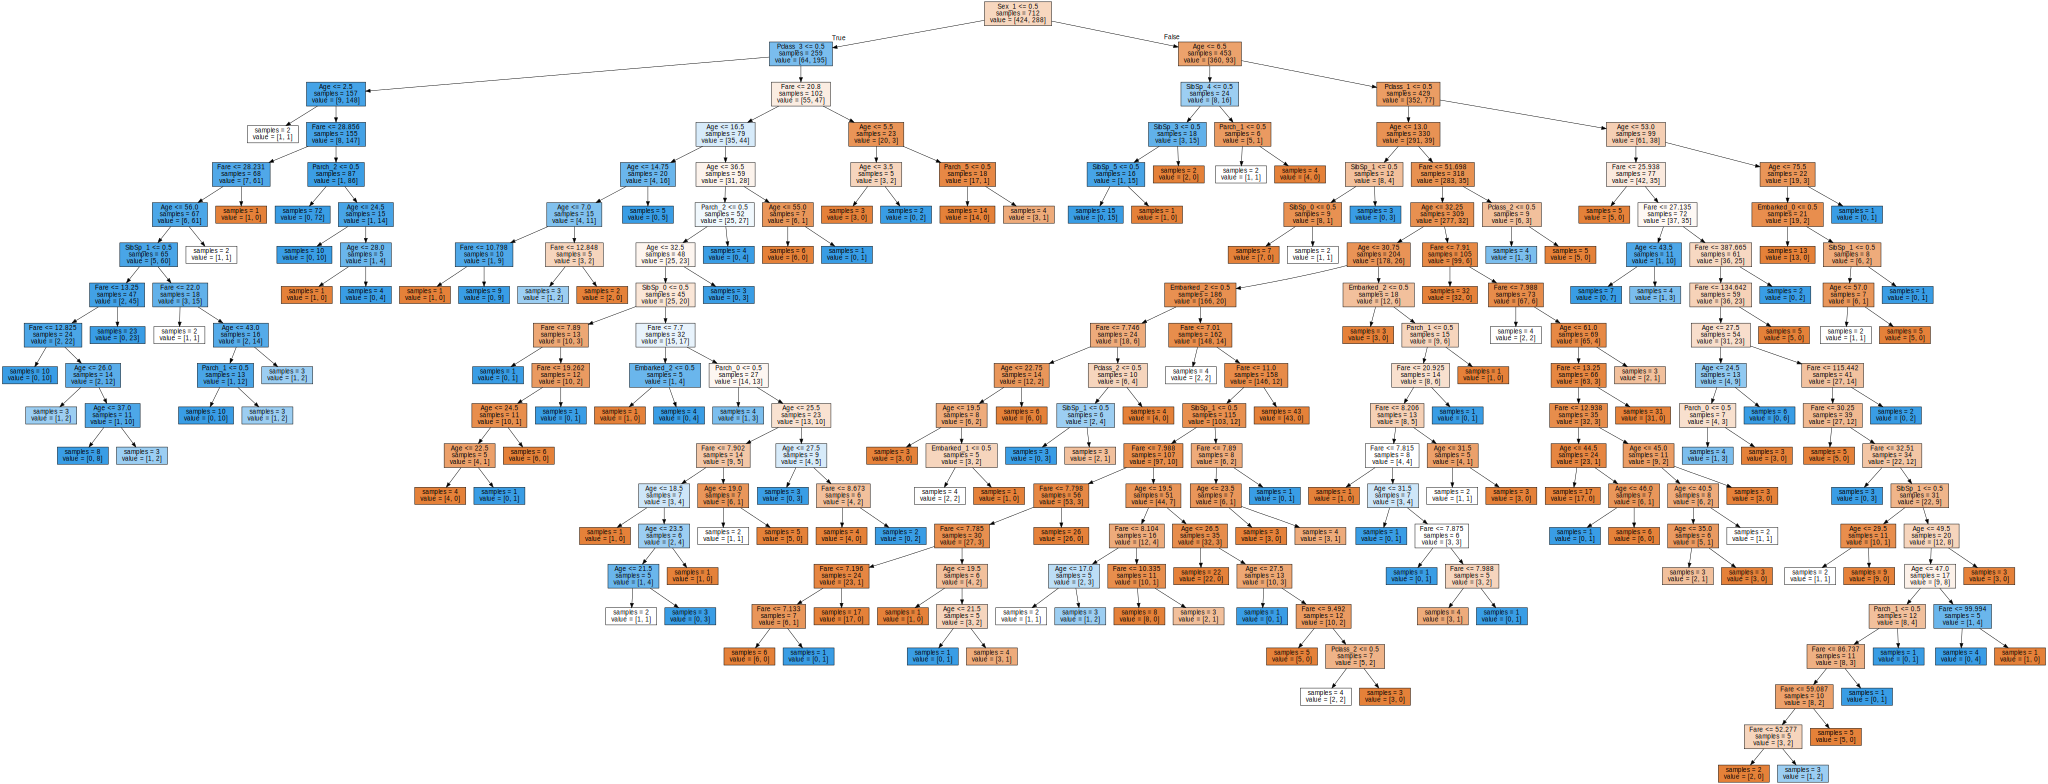

0.7600547730829421

0.05586131119255289

In [19]:
from visu import plot_classifier as plot_clf, plot_clf_file
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score

# drop columns
X_y, X, y = Preprocessor().fit_transform(df_train, drop_columns_onehot_encoded=True)
X_np, y_np = X.to_numpy(), y.to_numpy()
X_y.head(10)

clf: DecisionTreeClassifier = DecisionTreeClassifier(random_state=42, min_samples_split=5)
clf.fit(X_np, y_np)
clf.score(X_np, y_np)

# plot_clf(clf=clf, feature_names=[i for i in X.columns])
plot_clf_file(clf, feature_names=[c for c in X.columns])

scores = cross_val_score(clf, cv=10, X=X_np, y=y_np, scoring=make_scorer(accuracy_score))
scores.mean()
scores.std()


# RandomForest: Create train and test data from train data set

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score

X_y, X, y = Preprocessor().fit_transform(df_train, drop_columns_onehot_encoded=True)

X_np, y_np = X.to_numpy(), y.to_numpy()

n_max_features = int(np.sqrt(X.columns.size))
clf = RandomForestClassifier(max_depth=6, n_estimators=100, max_features=n_max_features, random_state=42, min_samples_split=2)
clf.fit(X_np, y_np).score(X_np, y_np)

scores = cross_val_score(clf, cv=10, X=X_np, y=y_np, scoring=make_scorer(accuracy_score))
scores.mean()
scores.std()

0.8623595505617978

0.8146909233176839

0.04401939195960311